In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('Taxi_Trips.csv',usecols=['Trip Start Timestamp','Trip Seconds','Trip Miles','Pickup Community Area' ,'Dropoff Community Area'])
df.head()

,Trip Start Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area
0,01/01/2019 12:00:00 AM,885.0,3.45,NaN,NaN
1,01/01/2019 12:00:00 AM,8.0,0.00,NaN,NaN
2,01/01/2019 12:00:00 AM,960.0,4.90,NaN,NaN
3,01/01/2019 12:00:00 AM,420.0,1.50,NaN,NaN
4,01/01/2019 12:00:00 AM,420.0,0.50,NaN,NaN


In [3]:
df.dropna(subset=['Trip Start Timestamp','Pickup Community Area', 'Dropoff Community Area'],
          axis=0, # axis=0表示删除行；
          how='any', # how=any表示任意一个出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )

In [4]:
df["start"]=df["Trip Start Timestamp"].map(lambda x:x.split(" ")[0])
df["start"]=pd.to_datetime(df["start"], format='%m/%d/%Y')
df["number of weeks"] =  df["start"].dt.isocalendar().week
df=df[['Trip Seconds',"Trip Miles","Pickup Community Area","Dropoff Community Area","start","number of weeks"]]
df

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,start,number of weeks
16,600.0,0.00,8.0,32.0,2019-01-01,1
18,1260.0,0.60,77.0,28.0,2019-01-01,1
19,120.0,0.30,32.0,32.0,2019-01-01,1
20,360.0,0.80,8.0,8.0,2019-01-01,1
22,360.0,1.00,8.0,8.0,2019-01-01,1
...,...,...,...,...,...,...
24302796,60.0,0.00,28.0,28.0,2021-12-31,52
24302797,60.0,0.00,76.0,76.0,2021-12-31,52
24302799,0.0,0.00,76.0,76.0,2021-12-31,52
24302800,382.0,0.73,8.0,8.0,2021-12-31,52


In [5]:
df["year"]=df["start"].dt.isocalendar().year
df["num_weeks"]=df["number of weeks"]+(df["year"]-2019)*52

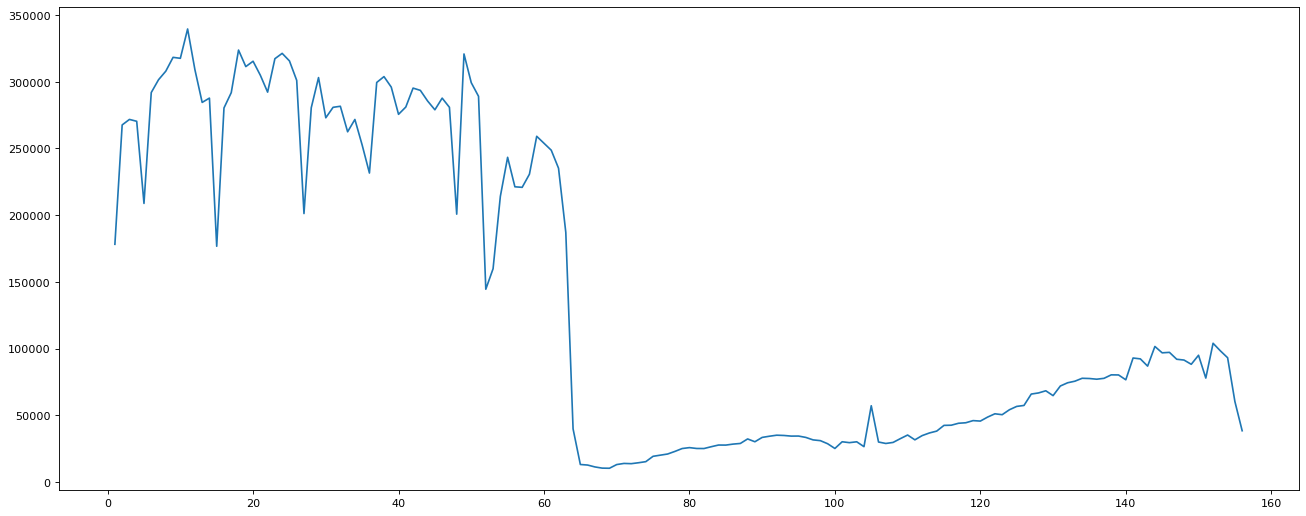

In [6]:
count=df['num_weeks'].value_counts()
x=list(range(1,157))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])

In [7]:
count_area=df['Dropoff Community Area'].groupby(df['Pickup Community Area']).value_counts()

In [8]:
count_area

Pickup Community Area  Dropoff Community Area
1.0                    1.0                       35819
                       77.0                      14418
                       2.0                       13929
                       3.0                        8155
                       8.0                        7594
                                                 ...  
77.0                   54.0                          4
                       62.0                          4
                       52.0                          2
                       55.0                          1
                       74.0                          1
Name: Dropoff Community Area, Length: 5713, dtype: int64

In [9]:
count_area[1,73]

70

In [10]:
df1=df[(df["Pickup Community Area"]==1)&(df["Dropoff Community Area"]==1)]
df1

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,start,number of weeks,year,num_weeks
1356,287.0,0.70,1.0,1.0,2019-01-01,1,2019,1
1940,25.0,0.00,1.0,1.0,2019-01-01,1,2019,1
2074,0.0,0.00,1.0,1.0,2019-01-01,1,2019,1
2554,449.0,1.80,1.0,1.0,2019-01-01,1,2019,1
3942,376.0,0.99,1.0,1.0,2019-01-01,1,2019,1
...,...,...,...,...,...,...,...,...
24298831,613.0,1.56,1.0,1.0,2021-12-30,52,2021,156
24299341,246.0,1.49,1.0,1.0,2021-12-30,52,2021,156
24300765,261.0,0.79,1.0,1.0,2021-12-30,52,2021,156
24301002,83.0,0.19,1.0,1.0,2021-12-30,52,2021,156


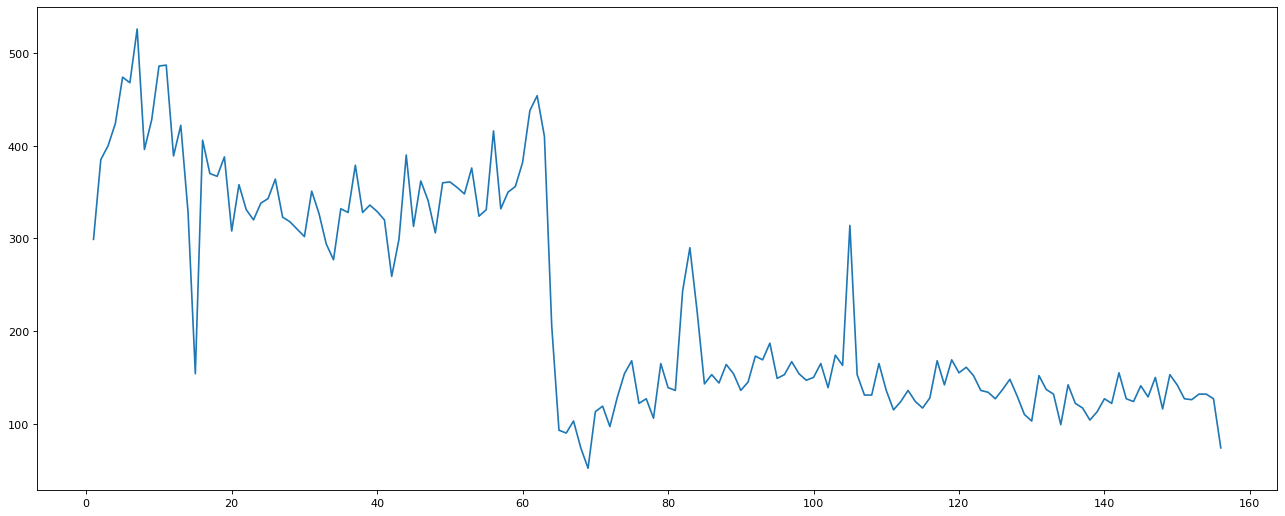

In [11]:
count1=df1['num_weeks'].value_counts()
x=list(range(1,157))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count1[x])

In [14]:
od_list=[]
for i in range(1,78):
    for j in range(1,78):
        if (i,j) in count_area.index:
            if (count_area[i,j]>5000):
                od_list.append((i,j))
od_list

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 6),
 (1, 8),
 (1, 77),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 8),
 (2, 77),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 28),
 (3, 32),
 (3, 76),
 (3, 77),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 77),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 16),
 (6, 21),
 (6, 22),
 (6, 24),
 (6, 28),
 (6, 32),
 (6, 33),
 (6, 76),
 (6, 77),
 (7, 3),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 22),
 (7, 24),
 (7, 28),
 (7, 32),
 (7, 76),
 (7, 77),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 14),
 (8, 16),
 (8, 21),
 (8, 22),
 (8, 23),
 (8, 24),
 (8, 25),
 (8, 28),
 (8, 31),
 (8, 32),
 (8, 33),
 (8, 34),
 (8, 35),
 (8, 38),
 (8, 39),
 (8, 41),
 (8, 43),
 (8, 56),
 (8, 60),
 (8, 76),
 (8, 77),
 (10, 10),
 (11, 11),
 (11, 15),
 (13, 13),
 (14, 14),
 (14, 16),
 (15, 15),
 (16, 6),
 (16, 14),
 (16, 16),
 (19, 19),
 (21, 21),
 (22, 6),
 (22, 7),
 (22, 8),
 (22, 22),
 (22, 24),
 (24, 6),

In [15]:
len(od_list)

247

In [40]:
odtrips=[]
max_weeks=max(df['num_weeks'])
for i in range(0,len(od_list)):   
    df_area=df[(df["Pickup Community Area"]==od_list[i][0])&(df["Dropoff Community Area"]==od_list[i][1])]
    count_area=df_area['num_weeks'].value_counts()
    #array=np.zeros(len(count_area))
    for j in range(1,max_weeks+1):
        if j in count_area.index:
            #array[j-1]=count_area[j]
            odtrips.append(count_area[j])
        else:
            odtrips.append(0)

In [44]:
s=int(len(odtrips)/max_weeks)
odtrips = np.mat(odtrips).reshape(s,max_weeks)
odtrips = np.array(odtrips)
odtrips

array([[299, 385, 400, ..., 132, 127,  74],
       [151, 143, 153, ...,  78,  63,  22],
       [100,  69,  88, ...,  32,  30,  25],
       ...,
       [ 92, 147, 142, ...,  93,  75,  34],
       [ 45,  73,  98, ...,  44,  56,  14],
       [681, 823, 702, ..., 369, 326, 215]], dtype=int64)

In [45]:
import sys
from clustering import DTWClustering

%matplotlib inline

In [46]:
model = DTWClustering(odtrips, 5)

In [47]:
model.train()

0.0010782000000517655 queue placement complete
15.17617000000007 computations complete
15.176781799999958 iteration complete
0.0005476000001181092 queue placement complete
13.826874699999962 computations complete
13.827532999999903 iteration complete
0.0005048999998962245 queue placement complete
13.957415399999945 computations complete
13.958011700000043 iteration complete
0.0005086000001028879 queue placement complete
14.002998600000183 computations complete
14.00361799999996 iteration complete
0.0005174000000351953 queue placement complete
14.426373700000113 computations complete
14.426995199999965 iteration complete
0.0005189999999402062 queue placement complete
14.838083500000039 computations complete
14.838735700000143 iteration complete
0.0005141999999977998 queue placement complete
13.989568400000053 computations complete
13.991230600000108 iteration complete
0.0005281999999624531 queue placement complete
14.053233300000102 computations complete
14.053910500000029 iteration com

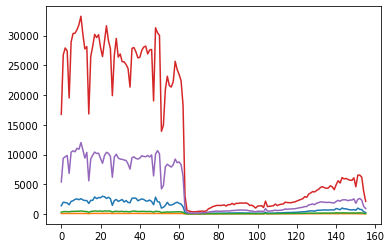

In [48]:
for centroid in model.centroids:
    plt.plot(np.arange(len(centroid)), centroid)

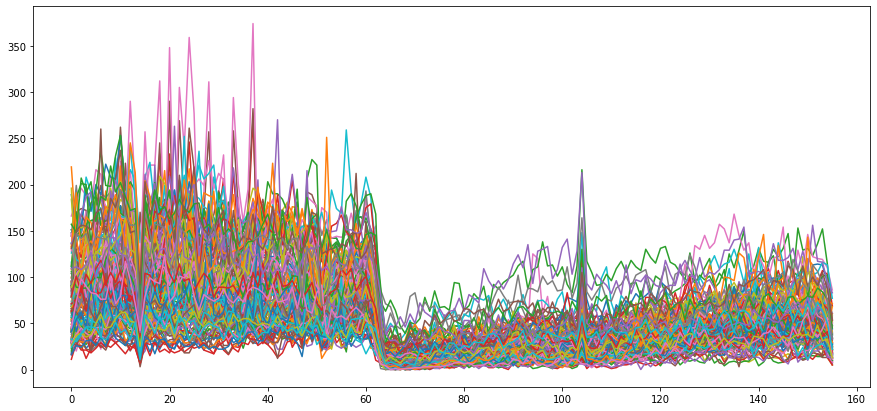

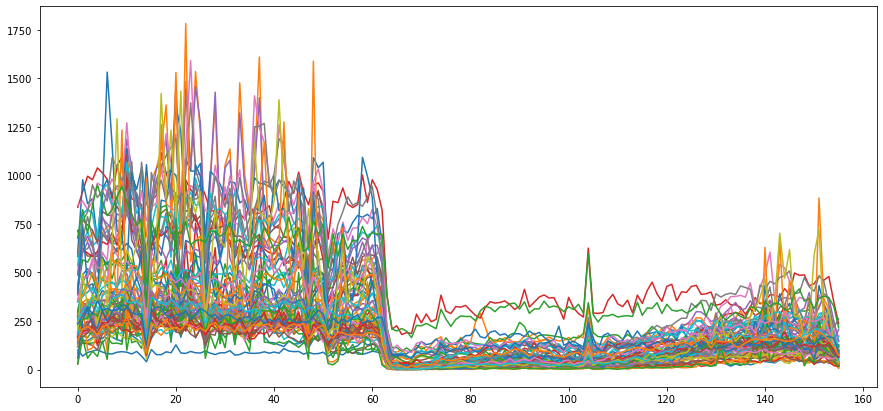

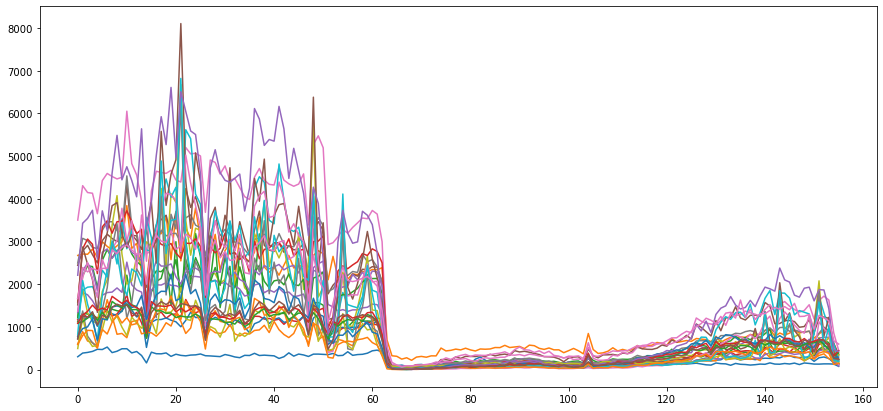

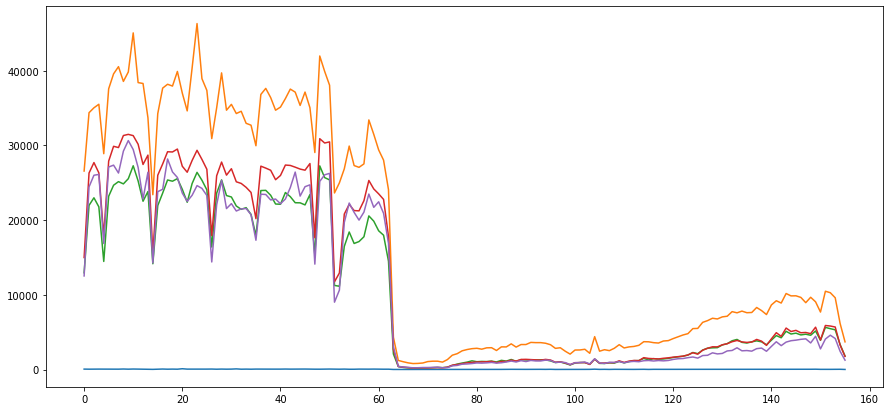

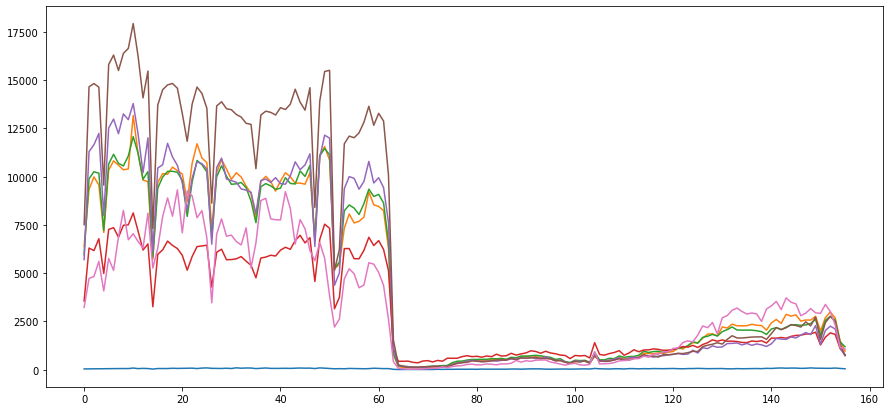

In [50]:
for centroid_key in model.clusters:
    plt.figure(figsize=(15,7))
    centroid = odtrips[centroid_key]
    plt.plot(np.arange(len(centroid)), centroid)
    for series_index in model.clusters[centroid_key]:
        series = odtrips[series_index]
        plt.plot(np.arange(len(series)), series)
    
    plt.show()